<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/data_collection_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting spu google drive
from google.colab import drive
drive.mount('/content/drive')

########################################

#changing the working directory
import os
os.chdir("/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior")

!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SPU DS Graduate RA - EV Project/EV Market Analysis and Consumer Behavior


### EV - Market Analysis and Consumer Behavior

This notebook is for exploring  various datasets conducting preliminary exploratory data analysis (EDA) with the objective of understanding if they are suitable for analyzing the Electric Vehicle (EV) market and discerning consumer behavior trends.


> - Data Collection and Integration: Acquisition and integration of different datasets relevant to the EV market and consumer behavior. (datasets may include information on EV sales, charging infrastructure, government incentives, demographic data, consumer surveys, and possibly other related metrics)
> - Data Cleaning and Preparation: Cleaning and preprocessing the collected datasets to ensure data quality and consistency.
> - Preliminary EDA: Conducting the EDA to gain insights into the characteristics and patterns within the data.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

The first dataset that we are going to look at is the **Global Electric Vehicle Market Share** downloaded from [data.world](https://data.world/makeovermonday/2023w7/workspace/file?filename=Global+Electric+Vehicle+Market+Share.xlsx)


Data Source: [Counterpoint Research](https://www.counterpointresearch.com/insights/global-electric-vehicle-market-share/)

In [21]:
data = pd.read_excel('https://query.data.world/s/j3zfvtlaqca6nwnhs62wfecky7rduf?dws=00000')
data.head()

,Brands,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,BYD Auto,0.07,0.11,0.12,0.14,0.16,0.20
1,Tesla,0.15,0.15,0.14,0.16,0.12,0.13
2,Wuling,0.07,0.06,0.05,0.06,0.05,0.05
3,Volkswagen,0.07,0.06,0.05,0.04,0.04,0.04
4,GAC Motor,0.02,0.02,0.02,0.02,0.03,0.03


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   6 non-null      object 
 1   Q2 2021  6 non-null      float64
 2   Q3 2021  6 non-null      float64
 3   Q4 2021  6 non-null      float64
 4   Q1 2022  6 non-null      float64
 5   Q2 2022  6 non-null      float64
 6   Q3 2022  6 non-null      float64
dtypes: float64(6), object(1)
memory usage: 464.0+ bytes


In [23]:
data.drop('Brands', axis=1)

,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022
0,0.07,0.11,0.12,0.14,0.16,0.20
1,0.15,0.15,0.14,0.16,0.12,0.13
2,0.07,0.06,0.05,0.06,0.05,0.05
3,0.07,0.06,0.05,0.04,0.04,0.04
4,0.02,0.02,0.02,0.02,0.03,0.03
5,0.62,0.59,0.62,0.59,0.60,0.55


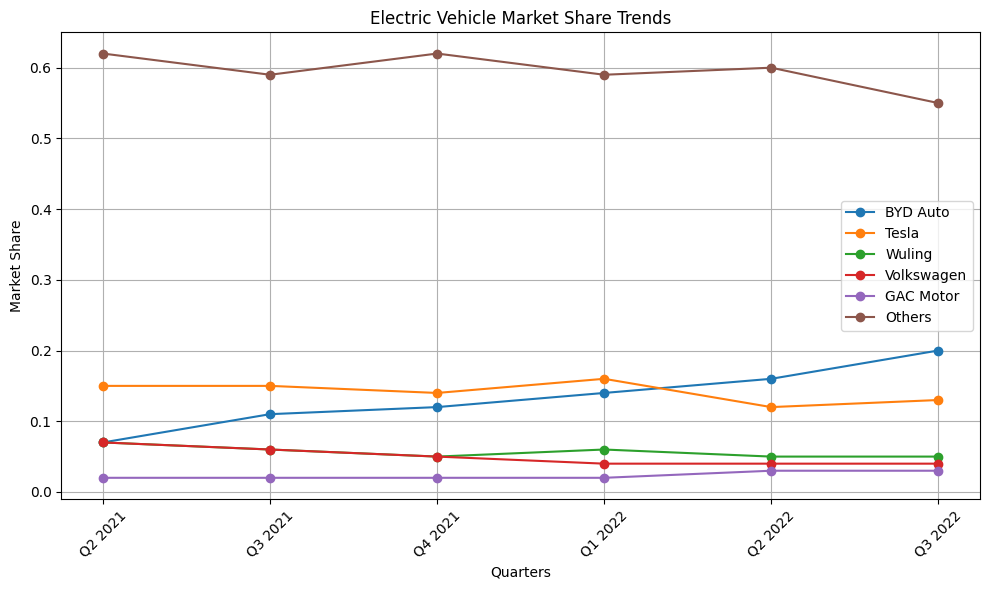

In [24]:
# Plotting market share trends for all brands
plt.figure(figsize=(10, 6))

for index, row in data.iterrows():
    plt.plot(data.columns[1:], row[1:], marker='o', label=row['Brands'])

plt.title('Electric Vehicle Market Share Trends')
plt.xlabel('Quarters')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

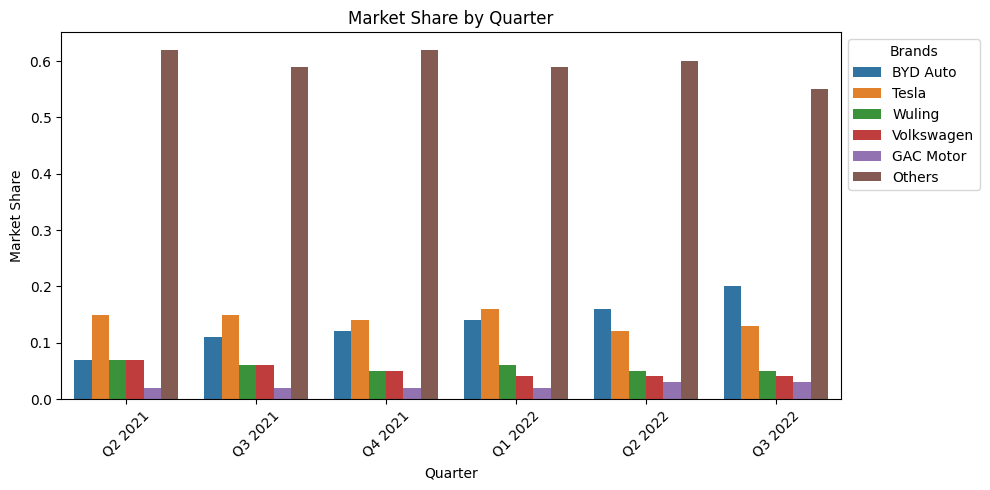

In [25]:
# Melt the data to make it suitable for a bar plot
melted_data = data.melt(id_vars=['Brands'], var_name='Quarter', value_name='Market_Share')

# Plotting bar plot of market share by quarter
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=melted_data)
plt.title('Market Share by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

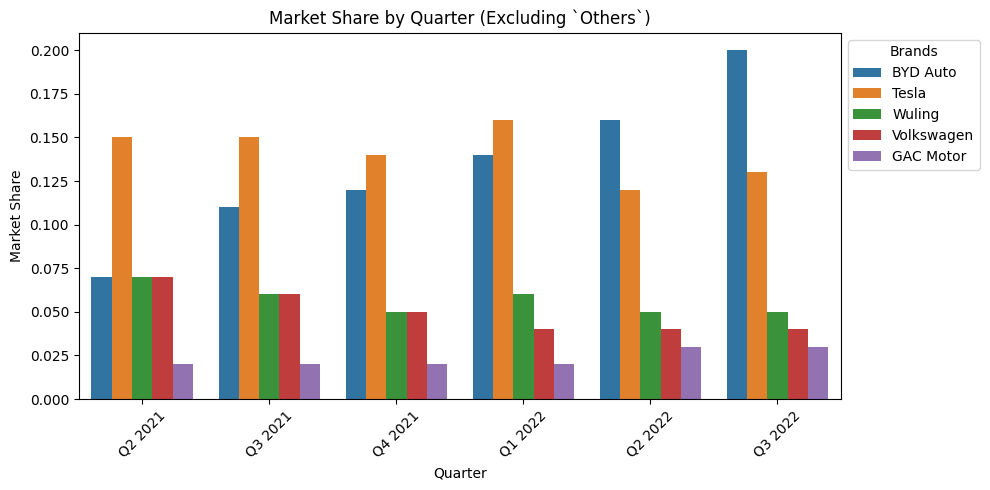

In [26]:
# Filtering-out `Others`
filtered_data = data[data['Brands'] != "Others"]

# Melt the filtered data to make it suitable for a bar plot
melted_data = filtered_data.melt(id_vars=['Brands'], var_name='Quarter', value_name='Market_Share')

# Plotting bar plot of market share by quarter
plt.figure(figsize=(10, 5))
sns.barplot(x='Quarter', y='Market_Share', hue='Brands', data=melted_data)
plt.title('Market Share by Quarter (Excluding `Others`)')
plt.xlabel('Quarter')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='Brands', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The above dataset basically is tracking the market share of different electric vehicle brands over several quarters from **Q2 2021** to **Q3 2022**

- **BYD Auto:** BYD Auto is a Chinese automobile manufacturer specializing in electric vehicles (EVs), batteries, and renewable energy solutions.
- **Tesla:** Tesla is an American electric vehicle and clean energy company founded by Elon Musk.
- **Wuling:** Wuling is a Chinese automotive manufacturer, known for producing electric vehicles, particularly electric minivans and microvans.
- **Volkswagen:** Volkswagen (VW) is a German automaker known for its wide range of vehicles, including electric cars.
- **GAC Motor:** GAC Motor is a Chinese automobile manufacturer affiliated with Guangzhou Automobile Group.


From the above visualization, BYD at the end of **Q3 2022** emerging as the market leader, overtaking Tesla. The other takeway from the visualizations is that 3 out of the 5 top EV manufacturers are Chineses owned companies. And that the **BIG 3** Americal Automotive companies are nowhere to befound.

The dataset that we are going to look at is called **IEA Global EV Dataset** which is part of the Global EV Data Explorer, developed by the **International Energy Agency (IEA)**, provides a comprehensive view of historical and projected data related to electric vehicles (EVs).

**Data Coverage:**
- Explore information on EV sales, stock, charging infrastructure, and oil displacement.
- The data is regularly updated, with the most recent update on April 26, 2023 <br> <br>

**Data Variables Description:**
- **Region:** This column denotes the geographic region to which the data pertains. In the provided sample, the region is "Australia".
- **Category:** This column categorizes the type of data. In the sample, it includes historical data related to electric vehicle (EV) stock and EV sales.
- **Parameter:** This column specifies the specific parameter being measured or described in the dataset. Examples include "EV stock" and "EV sales share".
- **Mode:** This column indicates different modes of operation or aspects related to electric vehicles. In the sample, it includes "Cars".
- **Powertrain:** This column describes the type of powertrain used in the electric vehicles. In the sample, it includes "BEV" (Battery Electric Vehicle).
- **Year:** This column denotes the year to which the data corresponds. In the sample, it ranges from 2011 to 2012.
- **Unit:** This column specifies the unit of measurement for the corresponding 'value' variable. In the sample, it includes "Vehicles" and "percent".
- **Value:** This column contains the actual numerical values of the data being measured or described in the dataset. It represents the number of vehicles or percentages, depending on the unit specified.

In [27]:
data = pd.read_csv("marketshare and industry data/IEA Global EV Data 2023.csv")
data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB


In [29]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(data.columns):
  datatype = data[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

region  --> object
category  --> object
parameter  --> object
mode  --> object
powertrain  --> object
year  --> int64
unit  --> object
value  --> float64


In [30]:
# Explore unique values of categorical variables
print("Unique regions:", data['region'].unique())
print("Unique categories:", data['category'].unique())
print("Unique parameters:", data['parameter'].unique())
print("Unique modes:", data['mode'].unique())
print("Unique powertrains:", data['powertrain'].unique())
print("Unique years:", data['year'].unique())
print("Unique units:", data['unit'].unique())


Unique regions: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other Europe' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkiye' 'United Kingdom' 'USA' 'World']
Unique categories: ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique parameters: ['EV stock' 'EV sales share' 'EV stock share' 'EV sales'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique modes: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique powertrains: ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']
Unique years: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2010 2025
 2030]
Unique units: ['Vehicles' 'percent' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement

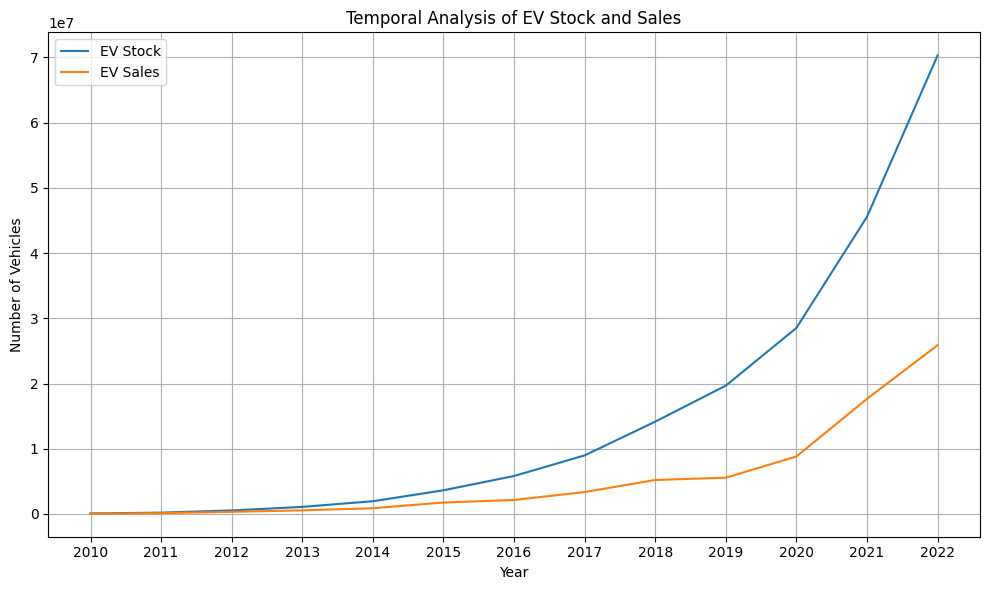

In [31]:
# Filtering data for EV stock and sales
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock.groupby('year')['value'].sum()
ev_sales_yearly = ev_sales.groupby('year')['value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()


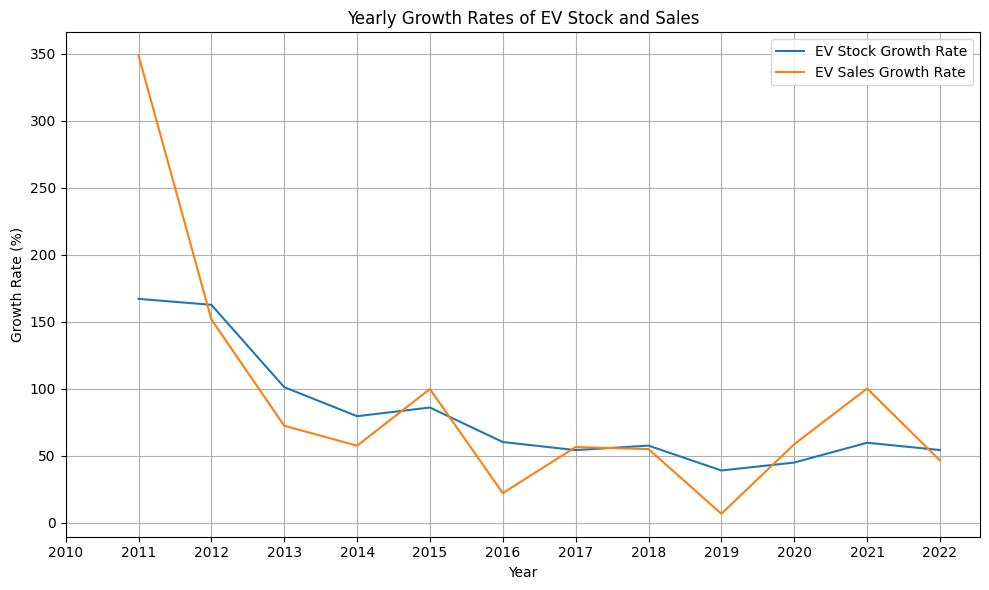

In [32]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

In [33]:
# Electricity Demand and EV Adoption

# Filtering data for Electricity Demand and EV Sales
electricity_demand = data[(data['parameter'] == 'Electricity demand') & (data['category'] == 'Historical')]
ev_sales = data[(data['parameter'] == 'EV sales') & (data['category'] == 'Historical')]


fig = make_subplots(rows=1, cols=2, subplot_titles=('Electricity Demand', 'EV Sales'))

# Adding bar graphs to subplots
fig.add_trace(go.Bar(x=electricity_demand['year'], y=electricity_demand['value'], name='Electricity Demand'), row=1, col=1)
fig.add_trace(go.Bar(x=ev_sales['year'], y=ev_sales['value'], name='EV Sales'), row=1, col=2)


fig.update_layout(title='Electricity Demand and EV Adoption Over Time',
                  xaxis=dict(title='Year'),
                  yaxis=dict(title='Value'),
                  barmode='group')


fig.show()

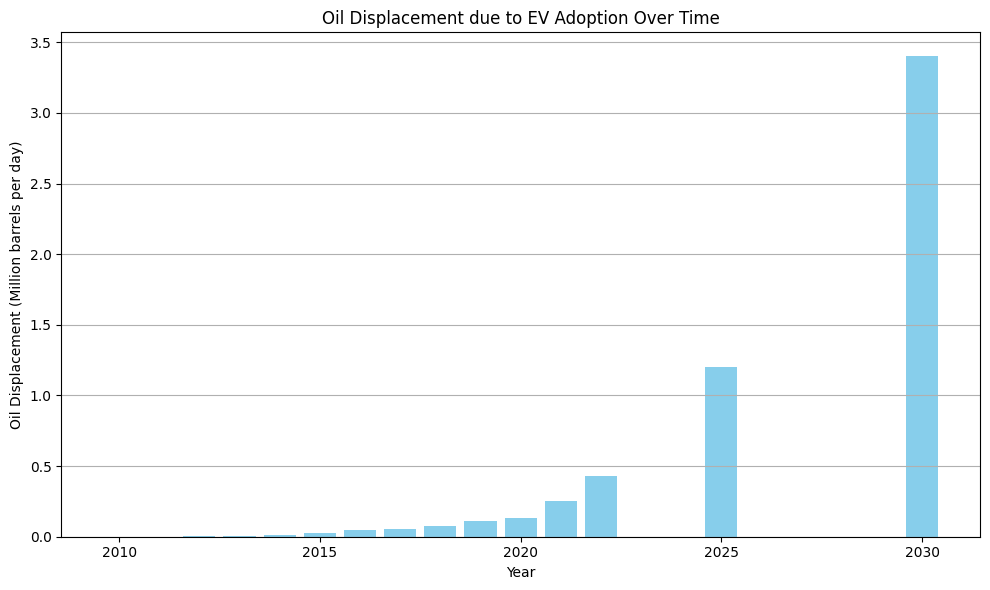

In [34]:
# Oil Displacement Over Time
oil_displacement = data[data['parameter'] == 'Oil displacement Mbd']

plt.figure(figsize=(10, 6))
plt.bar(oil_displacement['year'], oil_displacement['value'], color='skyblue')
plt.title('Oil Displacement due to EV Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Oil Displacement (Million barrels per day)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
# Comparing EV Adoption Across Regions

# Filtering data for EV stock
ev_stock = data[(data['parameter'] == 'EV stock') & (data['category'] == 'Historical')]

# Aggregating EV stock by year and region
ev_stock_agg = ev_stock.groupby(['year', 'region'])['value'].sum().reset_index()


fig = px.bar(ev_stock_agg, x='year', y='value', color='region',
             labels={'value': 'EV Stock', 'year': 'Year'},
             title='EV Adoption Across Regions Over Time',
             barmode='stack')
fig.update_layout(xaxis=dict(type='category'))
fig.show()


In [37]:
# Filter the data for EV sales
ev_sales_data = data[(data['parameter'] == 'EV sales') & (data['unit'] == 'Vehicles')]

def create_choropleth():
    # filtered_data = ev_sales_data.copy()

    fig = px.choropleth(ev_sales_data,
                        locations='region',
                        locationmode='country names',
                        color='value',
                        color_continuous_scale='Viridis',
                        hover_name='region',
                        projection='natural earth',
                        title='EV Sales',
                        animation_frame='year',
                        labels={'value': 'EV Sales', 'year': 'Year'},
                        )
    fig.update_layout(updatemenus=[
        dict(
            buttons=[
                dict(label='BEV',
                     method='update',
                )
                for year in ev_sales_data['powertrain'].unique()
            ],
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
        dict(
            buttons=[
                dict(label= 'Year',
                     method='animate',
                     args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 300}}])
                for year in ev_sales_data['year'].unique()
            ],

        )
    ])

    fig.show()


create_choropleth()

In [38]:

#Comparison of EV Sales Share Across Regions

# Filtering the data to include only rows where parameter is 'EV sales share'
ev_sales_share_data = data[data['parameter'] == 'EV sales share']

# Grouping the data by region and year, then calculating the mean sales share for each region
mean_sales_share_by_region = ev_sales_share_data.groupby(['region', 'year'])['value'].mean().reset_index()


fig = px.bar(mean_sales_share_by_region, x='year', y='value', color='region',
             title='Comparison of EV Sales Share Across Regions',
             labels={'year': 'Year', 'value': 'EV Sales Share (%)', 'region': 'Region'},
             barmode='group')

fig.show()

In [39]:
# Distribution of Powertrain Types Over Years

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]
pivot_data = filtered_data.pivot_table(index='year', columns='powertrain', values='value', aggfunc='sum', fill_value=0)
powertrains = pivot_data.columns.tolist()

# Creatinng a bar trace for each powertrain type
traces = []
for powertrain in powertrains:
    trace = go.Bar(
        x=pivot_data.index,
        y=pivot_data[powertrain],
        name=powertrain
    )
    traces.append(trace)

# Plotting the grouped bar chart using Plotly
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [40]:
# Distribution of Powertrain Types Over Years filtered by Region

# Filtering the data for the relevant parameters and years
filtered_data = data[(data['parameter'] == 'EV stock') & (data['year'] >= 2010)]

# Pivot the data to get counts of each powertrain type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'powertrain'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of powertrain types
powertrains = pivot_data.columns.get_level_values('powertrain').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each powertrain type and region
traces = []
for powertrain in powertrains:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        trace = go.Bar(
            x=pivot_data.index,
            y=pivot_data[region, powertrain],
            name=region + ' - ' + powertrain,
            visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
        )
        traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Distribution of Powertrain Types Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [41]:
# Filter data for EV adoption by different vehicle modes
ev_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Create a stacked bar graph
fig = go.Figure()

for mode in grouped_data['mode'].unique():
    mode_data = grouped_data[grouped_data['mode'] == mode]
    fig.add_trace(go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    ))

fig.update_layout(
    barmode='stack',
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis_title='Year',
    yaxis_title='Number of Electric Vehicles',
    legend_title='Vehicle Mode'
)

fig.show()

In [42]:
# Filter data for EV stock
ev_stock_data = data[data['parameter'] == 'EV stock']

# Group data by year and mode, summing up the values
grouped_data = ev_stock_data.groupby(['year', 'mode'])['value'].sum().reset_index()

# Get unique modes and years
modes = grouped_data['mode'].unique()
years = grouped_data['year'].unique()

# Create a list to hold traces for each mode
traces = []

# Iterate over modes and create a trace for each mode
for mode in modes:
    mode_data = grouped_data[grouped_data['mode'] == mode]
    trace = go.Bar(
        x=mode_data['year'],
        y=mode_data['value'],
        name=mode
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Electric Vehicles'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [43]:
data['parameter'].unique()

array(['EV stock', 'EV sales share', 'EV stock share', 'EV sales',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [44]:
# Filter data for EV stock
filtered_data = data[(data['parameter'] == 'EV sales') & (data['year'] >= 2010)]

# Pivot the data to get counts of each mode type for each region and year
pivot_data = filtered_data.pivot_table(index='year', columns=['region', 'mode'], values='value', aggfunc='sum', fill_value=0)

# Creating a list of mode types
modes = pivot_data.columns.get_level_values('mode').unique().tolist()

# Creating a dropdown menu for region selection
region_dropdown = [{'label': region, 'method': 'update', 'args': [{'visible': [region in button for button in pivot_data.columns.get_level_values('region').unique().tolist()]}]} for region in pivot_data.columns.get_level_values('region').unique().tolist()]

# Creating traces for each mode type and region
traces = []
for mode in modes:
    for region in pivot_data.columns.get_level_values('region').unique().tolist():
        if (region, mode) in pivot_data.columns:
            trace = go.Bar(
                x=pivot_data.index,
                y=pivot_data[region, mode],
                name = mode,
                visible=(region == pivot_data.columns.get_level_values('region').unique().tolist()[0])  # Show the first region by default
            )
            traces.append(trace)

# The layout including the title, axis labels, and dropdown menu
layout = go.Layout(
    title='Comparison of EV Adoption Across Different Vehicle Modes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Vehicles'),
    barmode='stack',
    updatemenus=[{'buttons': region_dropdown, 'direction': 'down', 'showactive': True}]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

Dataset1: The role of gender in consumer markets for electric vehicles - https://datadryad.org/stash/dataset/doi:10.25338/B80P8D

Data Description:

- Data sourced from households who purchased at least one new household vehicle since January 2008
- Questionnaire administered online
- Survey conducted in specific US states: California, Connecticut, Delaware,Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Oregon, Rhode Island, Vermont, and Washington
- Most states are "ZEV states" following California's Zero Emission Vehicle (ZEV) Mandate
- Non-ZEV states included for regional analysis or significance to the initial launch of retail ZEV sales in 2011
- Primary regional analysis focused on Northeast States for Coordinated Air Use Management (NESCAUM)
- NESCAUM member states: Connecticut, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, and Vermont
- Total sample size: 5,654 across all states

In [45]:
#lets read the datasets into pandas dataframes:
CA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863279")
DE_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863280")
MA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863281")
MD_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863284")
NJ_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863285")
NY_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863288")
OR_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863289")
WA_dataset = pd.read_csv("https://datadryad.org/stash/downloads/file_stream/863293")



### **Data Cleaning**:

We need to clean out the dataset, removing a bunch of columns that are not going to be usefull for our analylsis and the unsupervised exploratory data analysis. Afterwards, we are also going to also currate the variable descriptions from the JMP files to the CSV here in the jupyter notebook.

In [46]:
#lets just take a look the CA_dataset

CA_dataset.head()

,Response ID..,"No Trucks, Plus Incentives: drivetrain design 1","No Trucks, Plus Incentives: drivetrain design 2","No Trucks, Plus Incentives: drivetrain design 3","No Trucks, Plus Incentives: drivetrain design 4","No trucks, plus incentives: drivetrain design",Respondent Education,rRespondent Education,Respondent Gender,Respondent Sex,...,w Non-ZEV: maintenance cost,w Non-ZEV: fuel cost,w Non-ZEV: lifestyle,w Non-ZEV: charge/fuel time,w Non-ZEV: range,w Non-ZEV: fuel safety,w Non-ZEV: environmental concerns,w Non-ZEV: battery concerns,w Non-ZEV: reliability,w Non-ZEV: higher incentives
0,40,HEV,NaN,NaN,NaN,HEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Female,Female,...,0.0,0.0,0.0,5.490969,5.490969,0.0,0.0,0.0,0.0,NaN
1,36,HEV,NaN,NaN,NaN,HEV,College Graduate,College Graduate,Male,Male,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,32,PHEV,NaN,NaN,NaN,PHEV,"Masters, Doctorate, or Professional Degree","Masters, Doctorate, or Professional Degree",Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,48,EV,NaN,NaN,NaN,EV,High School Graduate or GED,High school or less,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,50,EV,NaN,NaN,NaN,EV,Some Graduate School,Some Graduate School,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [47]:
#for this dataset, lets take a look at the number of columns/variables and rows/records we are working with
CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB


In [48]:
#lets take a look at the rows and columns of all the datasets:
# Print info for each dataset
print("CA_dataset info:")
print(CA_dataset.info())
print("\nDE_dataset info:")
print(DE_dataset.info())
print("\nMA_dataset info:")
print(MA_dataset.info())
print("\nMD_dataset info:")
print(MD_dataset.info())
print("\nNJ_dataset info:")
print(NJ_dataset.info())
print("\nNY_dataset info:")
print(NY_dataset.info())
print("\nOR_dataset info:")
print(OR_dataset.info())
print("\nWA_dataset info:")
print(WA_dataset.info())

CA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 197 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(156), int64(1), object(40)
memory usage: 2.5+ MB
None

DE_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 190 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(149), int64(2), object(39)
memory usage: 297.0+ KB
None

MA_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 192 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(153), int64(1), object(38)
memory usage: 747.1+ KB
None

MD_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Columns: 194 entries, Response ID.. to w Non-ZEV: higher incentives
dtypes: float64(155), int64(2), object(37)
memory usage: 600.3+ KB
None

NJ_dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 

From the above, we can see that we have varying number of variable in the datasets. So before we start cleaningout the datasets and mearging them, it would be best to know the unique variables that are not available in other dataset and the common columns/variables in all the datasets.

In [49]:
# We are going to create 2 list of column names, common colums among all the datasets and non-common columns

# Extract column names
column_names = {
    "CA": set(CA_dataset.columns),
    "DE": set(DE_dataset.columns),
    "MA": set(MA_dataset.columns),
    "MD": set(MD_dataset.columns),
    "NJ": set(NJ_dataset.columns),
    "NY": set(NY_dataset.columns),
    "OR": set(OR_dataset.columns),
    "WA": set(WA_dataset.columns)
}

# Common column names
common_columns = set.intersection(*column_names.values())

# Columns not common in all datasets
not_common_columns = set.union(*column_names.values()) - common_columns

In [50]:
#for each not common column name, we are going to print out the datasets it's in:

for column in not_common_columns:
    print(f"\nColumn: {column}")
    for dataset, columns in column_names.items():
        if column in columns:
            print(f"- Dataset: {dataset}")


Column: Driving Exp Factor1: ZEV HEV imp
- Dataset: DE

Column: rConsider an EV
- Dataset: OR

Column: Prior FCV Factor2
- Dataset: CA

Column: Prior PEV Factor3: home public imp
- Dataset: MA
- Dataset: NJ
- Dataset: WA

Column: Prior FCV Factor1: time range public imp
- Dataset: NJ

Column: Prior PEV Factor1: range time imp
- Dataset: MA

Column: rIncome
- Dataset: CA

Column: Driving exp: FCV (trunc)
- Dataset: CA
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NJ
- Dataset: NY
- Dataset: OR

Column: Envi Factor1: AP regional personal imp
- Dataset: WA

Column: Daily flexibility 2
- Dataset: NY

Column: Prior PEV Factor1: safety reliability imp
- Dataset: OR

Column: Driving exp: EV (trunc)
- Dataset: CA
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NJ
- Dataset: NY
- Dataset: OR

Column: Prior FCV Factor4: public imp
- Dataset: MD

Column: Familiarity Factor1
- Dataset: CA

Column: Familiarity Factor1: HEV ZEV imp
- Dataset: DE
- Dataset: MA
- Dataset: MD
- Dataset: NY

We are not going to give much attention to the uncommon variable

We are going to remove the truncated columns and some columns that we dont have any use of

In [51]:
# Filter out column names containing "(trunc)"
common_columns_filtered = [col for col in common_columns if "(trunc)" not in col]


# List of variables to remove
variables_to_remove = [
    'Base body size 2',
    'No Trucks, Plus Incentives: drivetrain design 1',
    'No Trucks, Plus Incentives: drivetrain design 2',
    'No Trucks, Plus Incentives: drivetrain design 3',
    'No Trucks, Plus Incentives: drivetrain design 4',
    'FCV: fueling time',
    'Consider an FCV',
    'Driving exp: FCV',
    'Familiarity: FCVs',
    'FCV: public refueling',
    'FCV: purchase price',
    'FCV: range',
    'FCV: reliability',
    'FCV: safety',

]

# Filter out variables to remove from common_columns_filtered
common_columns_filtered = [col for col in common_columns_filtered if col not in variables_to_remove]

# Sort common_columns_filtered alphabetically
common_columns_filtered.sort()

# Move 'Response ID..' to the beginning of the list
common_columns_filtered.insert(0, common_columns_filtered.pop(common_columns_filtered.index('Response ID..')))


In [52]:
# Lets first filter the datasets to only havr the common variables
CA_dataset = CA_dataset[list(common_columns_filtered)]
DE_dataset = DE_dataset[list(common_columns_filtered)]
MA_dataset = MA_dataset[list(common_columns_filtered)]
MD_dataset = MD_dataset[list(common_columns_filtered)]
NJ_dataset = NJ_dataset[list(common_columns_filtered)]
NY_dataset = NY_dataset[list(common_columns_filtered)]
OR_dataset = OR_dataset[list(common_columns_filtered)]
WA_dataset = WA_dataset[list(common_columns_filtered)]


CA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 137 entries, Response ID.. to w Pro-ZEV: tech
dtypes: float64(107), int64(1), object(29)
memory usage: 1.7+ MB


We will merge the datasets! and start doing some preliminary EDA

In [53]:
# Adding a 'state' column to each dataset
CA_dataset['state'] = 'CA'
DE_dataset['state'] = 'DE'
MA_dataset['state'] = 'MA'
MD_dataset['state'] = 'MD'
NJ_dataset['state'] = 'NJ'
NY_dataset['state'] = 'NY'
OR_dataset['state'] = 'OR'
WA_dataset['state'] = 'WA'

# List of datasets to concatenate
datasets = [CA_dataset, DE_dataset, MA_dataset, MD_dataset, NJ_dataset, NY_dataset, OR_dataset, WA_dataset]

# Concatenating the datasets vertically
merged_dataset = pd.concat(datasets, axis=0)

# Resetting index after concatenation
merged_dataset.reset_index(drop=True, inplace=True)
# Checking the first few rows of the merged dataset
merged_dataset.head()

,Response ID..,Air pollution: lifesyle,Air pollution: personal worry,Air pollution: regional threat,Base body size,Climate change: lifestyle,Commute,Consider an EV,Consider an FCV,Daily flexibility,...,w Pro-ZEV: incentives,w Pro-ZEV: lifestyle,w Pro-ZEV: looks,w Pro-ZEV: maintenance cost,w Pro-ZEV: money to oil producers,w Pro-ZEV: oil imports,w Pro-ZEV: purchase cost,w Pro-ZEV: safer,w Pro-ZEV: tech,state
0,40,2.300,2.31,2.490,Compact,2.640,No,I (we) have not considered buying a vehicle th...,I (we) have not considered buying a vehicle th...,Every day we decide who will drive the car or ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA
1,36,2.940,2.87,1.410,Compact,2.940,No,I (we) have not and would not consider buyin...,"The idea has occurred, but no real steps have ...","I'm the only driver, so this question doesn't ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA
2,32,2.130,1.69,1.830,Compact,2.240,Yes,"Shopped for an electric vehicle, including a v...","Started to gather some information, but haven...","I'm the only driver, so this question doesn't ...",...,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.000000,5.0,CA
3,48,2.870,2.90,2.940,Large,2.870,No,I (we) already have a vehicle powered by elect...,I (we) already have a vehicle powered by hydrogen,I have my car; they have their car. In general...,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.000000,5.0,CA
4,50,4.125,2.96,4.125,Compact,4.125,Yes,I (we) have not and would not consider buyin...,I (we) have not and would not consider buyin...,"I'm the only driver, so this question doesn't ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.445806,0.0,CA


In [54]:
# Checking the shape of the merged dataset
merged_dataset.shape

(5248, 138)

In [62]:
merged_dataset.rename(columns={
  "Response ID..": "Response ID",
  "Income 2": "Income",
  "Veh 1 Total Price": "First Vehicle Total Price",
  "Veh 1 Total Price, don't know": "Do you know  First Vehicle Total Price"
}, inplace=True)


merged_dataset["Response ID"] = merged_dataset["Response ID"].astype("object")

In [65]:
# We are going to replace `4.125`or `5.7` in all the numerical variable with `nan`
# since from the variable descriptions 4.125 = don't know or 5.7 = no answer
numerical_columns = merged_dataset.select_dtypes(include=['float64']).columns

# Values to replace with NaN
values_to_replace = [4.125, 5.7]

# Replace the specified values with NaN in numerical columns
for column in numerical_columns:
    merged_dataset[column] = merged_dataset[column].replace(values_to_replace, float('nan'))

In [64]:
for column in merged_dataset.columns:
  print(f"{column}  ======>>  {merged_dataset[str(column)].dtype}")

Response ID  ======>>  object
Air pollution: lifesyle  ======>>  float64
Air pollution: personal worry  ======>>  float64
Air pollution: regional threat  ======>>  float64
Base body size  ======>>  object
Climate change: lifestyle  ======>>  float64
Commute  ======>>  object
Consider an EV  ======>>  object
Consider an FCV  ======>>  object
Daily flexibility  ======>>  object
Distance  ======>>  float64
Distance Week/Month  ======>>  object
Driving exp: EV  ======>>  float64
Driving exp: FCV  ======>>  float64
Driving exp: HEV  ======>>  float64
Driving exp: PHEV  ======>>  float64
EV: charge time  ======>>  float64
EV: home charge  ======>>  float64
EV: public charging  ======>>  float64
EV: purchase price  ======>>  float64
EV: range  ======>>  float64
EV: reliability  ======>>  float64
EV: safety  ======>>  float64
Electricy install authority  ======>>  object
Environmental risk  ======>>  float64
FCV: fueling time  ======>>  float64
FCV: public refueling  ======>>  float64
FCV: pur

KeyError: 'rBase body size'

In [ ]:
income_values = list(merged_dataset['Income 2'].unique())
fig = px.histogram(merged_dataset, x='state', color='Respondent Education', barmode='group')

# Update layout
fig.update_layout(
    title='Respondent Education Distribution by State',
    xaxis_title='State',
    yaxis_title='Count',
    xaxis={'categoryorder': 'total descending'},
    legend_title='Education',
    xaxis_tickangle=-45
)

# Add dropdown filter
fig.update_traces(visible=False, selector=dict(type='histogram'))

for income_value in income_values:
    visible_traces = merged_dataset['Income 2'] == income_value
    fig.add_trace(go.Histogram(
        x=merged_dataset[visible_traces]['state'],
        name=income_value,
        visible=True
    ))

# Add dropdown menu
buttons = []
for i, income_value in enumerate(income_values):
    buttons.append(dict(method='update',
                        label=income_value,
                        args=[{'visible': [False] * len(income_values)},
                              {'visible': [False] * i + [True] + [False] * (len(income_values) - i - 1)}]))

updatemenus = [{'buttons': buttons,
                'direction': 'down',
                'showactive': True}]

fig.update_layout(updatemenus=updatemenus)

# Show the plot
fig.show()

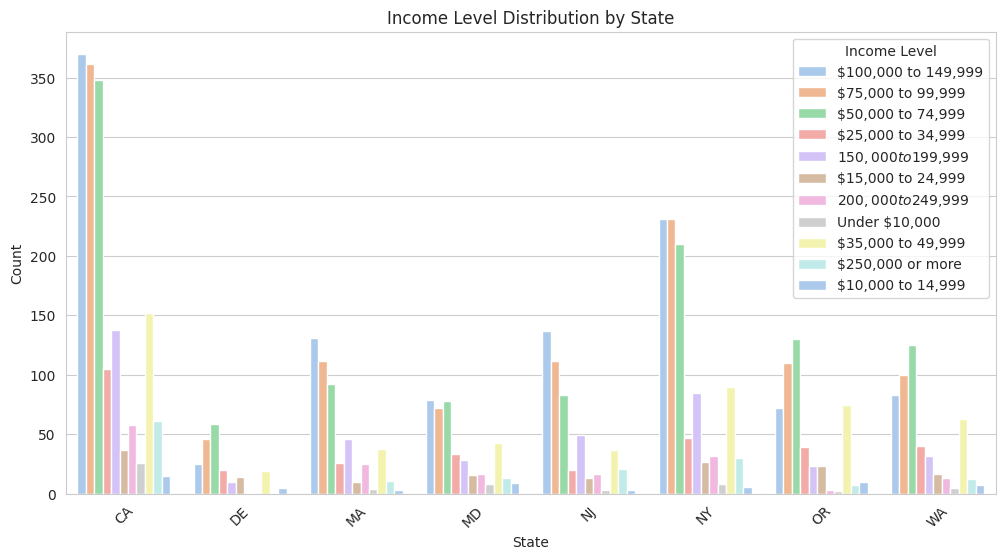

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_dataset, x='state', hue='Income 2', palette='pastel')
plt.title('Income Level Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Level')
plt.show()

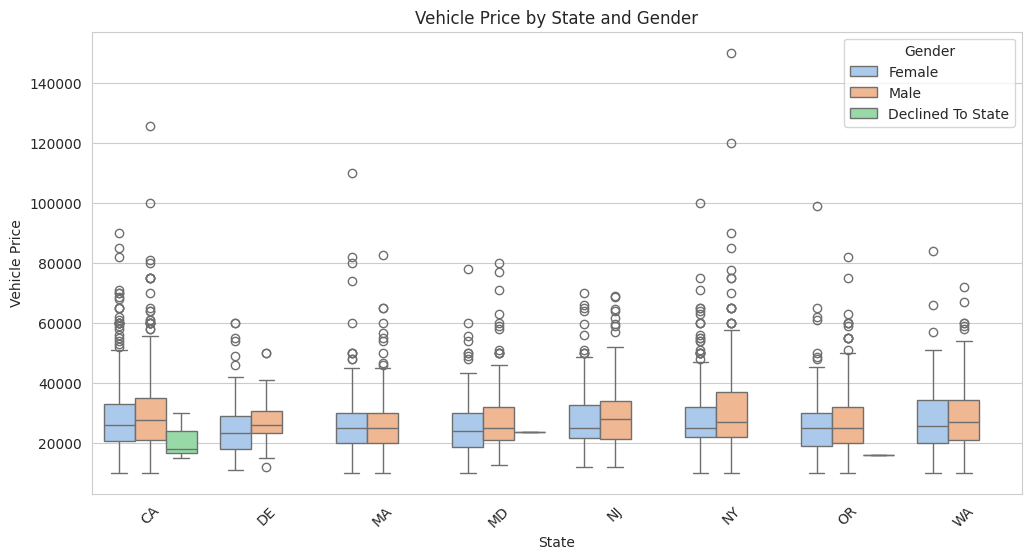

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_dataset, x='state', y='Veh 1 Total Price', hue='Respondent Gender', palette='pastel')
plt.title('Vehicle Price by State and Gender')
plt.xlabel('State')
plt.ylabel('Vehicle Price')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Data 2: Understanding the impact of public charging infrastructure on the consideration to purchase an electric vehicle in California -> https://datadryad.org/stash/dataset/doi:10.25338/B8035D

In [ ]:

data2 = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/2211655")

data2.head()

,id,PHEVfamiliarity,BEVfamiliarity,BEVexperience,PHEVexperience,fuelaphev,fuelabev,nameabev,nameaphev,infosearch,...,BEVmassmarket,PHEVpluginathome,PHEVenoughcharging,iPHEVchargetoolong,iPHEVrangetooshort,iPHEVhigherprice,iPHEVgasolinesafer,iPHEVgasolinemorereliable,PHEVenvsdamage,PHEVmassmarket
0,1,-3.0,-1.4,-3.0,-3.0,0,1,1,0,0,...,0.0,-3.0,-3.0,0.0,-3.0,-3.0,-2.9,-3.0,0.0,-1.7
1,2,1.6,1.7,-3.0,-3.0,1,1,0,1,0,...,2.5,-1.5,1.2,0.6,1.2,-1.0,-0.1,0.1,1.7,2.7
2,3,2.0,2.5,-3.0,-3.0,1,1,1,0,0,...,0.5,-3.0,-3.0,-3.0,-3.0,-3.0,-0.5,-0.5,-2.0,1.5
3,4,0.0,0.0,-3.0,-3.0,1,1,0,0,0,...,0.0,-3.0,-3.0,-3.0,-3.0,0.0,0.0,-3.0,3.0,0.0
4,5,1.8,1.5,2.4,2.4,1,0,0,0,0,...,2.2,1.9,0.5,0.5,-2.6,0.6,-2.7,0.7,2.6,-0.4


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2991 non-null   int64  
 1   PHEVfamiliarity            2991 non-null   float64
 2   BEVfamiliarity             2991 non-null   float64
 3   BEVexperience              2991 non-null   float64
 4   PHEVexperience             2991 non-null   float64
 5   fuelaphev                  2991 non-null   int64  
 6   fuelabev                   2991 non-null   int64  
 7   nameabev                   2991 non-null   int64  
 8   nameaphev                  2991 non-null   int64  
 9   infosearch                 2991 non-null   int64  
 10  BEVpositiveconvo           2991 non-null   int64  
 11  PHEVpositiveconvo          2991 non-null   int64  
 12  numofincentives            2991 non-null   int64  
 13  advertaware                2991 non-null   int64

In [ ]:
data2["id"] = data2["id"].astype(str)

In [ ]:
#lets loook at all the columns' names and their datatypes:
for column_name in list(data2.columns):
  datatype = data2[f"{column_name}"].dtype
  print(f"{column_name}  --> {datatype}")

id  --> object
PHEVfamiliarity  --> float64
BEVfamiliarity  --> float64
BEVexperience  --> float64
PHEVexperience  --> float64
fuelaphev  --> int64
fuelabev  --> int64
nameabev  --> int64
nameaphev  --> int64
infosearch  --> int64
BEVpositiveconvo  --> int64
PHEVpositiveconvo  --> int64
numofincentives  --> int64
advertaware  --> int64
age  --> object
maledummy  --> int64
HOVlaneuse  --> int64
income  --> float64
electricityaccess  --> float64
numofvehicles  --> int64
diffworkzip  --> int64
commuter  --> int64
allchargerspercapita  --> float64
allchargerspercapitawork  --> float64
allchargersperdiffwork  --> float64
pevregcapita  --> float64
pevregcapitawork  --> float64
pevregcapitadiffwork  --> float64
phevchargingandrange  --> float64
phevsafety  --> float64
phevchargingaccess  --> float64
phevmarketability  --> float64
bevchargingandrange  --> float64
bevsafety  --> float64
bevchargingaccess  --> float64
bevmarketability  --> float64
ordBEVconsider  --> object
ordPHEVconsider  --> 

##### Demographic Information:
- id: Identifier for each respondent.
- age: Age of the respondent.
- maledummy: Binary variable indicating gender (1 for male, 0 for female).
- Familiarity and Experience:
- PHEVfamiliarity: Level of familiarity with PHEVs.
- BEVfamiliarity: Level of familiarity with BEVs.
- PHEVexperience: Level of experience with PHEVs.
- BEVexperience: Level of experience with BEVs.
##### Attitudes and Behavior:
- fuelaphev: Fuel type familiarity with PHEVs.
- fuelabev: Fuel type familiarity with BEVs.
- nameabev: Brand familiarity with BEVs.
- nameaphev: Brand familiarity with PHEVs.
- infosearch: Level of information search regarding EVs.
- BEVpositiveconvo: Positive conversations about BEVs.
- PHEVpositiveconvo: Positive conversations about PHEVs.
- numofincentives: Number of incentives considered for EV purchase.
- advertaware: Awareness of EV-related advertisements.
- HOVlaneuse: Usage of HOV lanes.
- income: Household income level.
- electricityaccess: Access to electricity.
##### Charging Infrastructure:
- Various columns related to the density of charging infrastructure per capita, at workplaces, and in different areas.
- Market Considerations:
- Columns related to considerations and perceptions regarding charging convenience, vehicle range, pricing, safety, environmental impact, and market feasibility for both BEVs and PHEVs.
##### Consideration of Purchasing:
ordBEVconsider: Ordinal variable indicating the consideration of purchasing a BEV.
- ordPHEVconsider: Ordinal variable indicating the consideration of purchasing a PHEV.
- seeEVSE: Whether the respondent sees electric vehicle supply equipment (EVSE).


In [ ]:
# Distribution of age
age_hist = px.histogram(data2, x='age', title='Distribution of Age')
age_hist.update_layout(xaxis_title='Age', yaxis_title='Count')

age_hist.show()


In [ ]:
# Distribution of income
income_hist = px.histogram(data2, x='income', title='Distribution of Income')
income_hist.update_layout(xaxis_title='Income', yaxis_title='Count')

income_hist.show()


In [ ]:
# Distribution of number of vehicles owned
vehicles_hist = px.histogram(data2, x='numofvehicles', title='Distribution of Number of Vehicles Owned')
vehicles_hist.update_layout(xaxis_title='Number of Vehicles', yaxis_title='Count')

vehicles_hist.show()


In [ ]:
# Distribution of familiarity with PHEVs and BEVs
familiarity_hist = go.Figure()
familiarity_hist.add_trace(go.Histogram(x=data2['PHEVfamiliarity'], name='PHEV Familiarity'))
familiarity_hist.add_trace(go.Histogram(x=data2['BEVfamiliarity'], name='BEV Familiarity'))
familiarity_hist.update_layout(title='Distribution of Familiarity with PHEVs and BEVs',
                               xaxis_title='Familiarity Level',
                               yaxis_title='Count',
                               barmode='overlay')
familiarity_hist.update_traces(opacity=0.75)

familiarity_hist.show()


In [ ]:
# Distribution of experience with PHEVs and BEVs
experience_hist = go.Figure()
experience_hist.add_trace(go.Histogram(x=data2['PHEVexperience'], name='PHEV Experience'))
experience_hist.add_trace(go.Histogram(x=data2['BEVexperience'], name='BEV Experience'))
experience_hist.update_layout(title='Distribution of Experience with PHEVs and BEVs',
                              xaxis_title='Experience Level',
                              yaxis_title='Count',
                              barmode='overlay')
experience_hist.update_traces(opacity=0.75)


experience_hist.show()


In [ ]:
# Distribution of perceptions of BEVs and PHEVs
perceptions_hist = go.Figure()
perceptions_hist.add_trace(go.Histogram(x=data2['bevmarketability'], name='BEV Marketability'))
perceptions_hist.add_trace(go.Histogram(x=data2['phevmarketability'], name='PHEV Marketability'))
perceptions_hist.update_layout(title='Distribution of Marketability Perceptions of BEVs and PHEVs',
                                xaxis_title='Marketability Perception',
                                yaxis_title='Count',
                                barmode='overlay')
perceptions_hist.update_traces(opacity=0.75)

perceptions_hist.show()

In [ ]:
data2['numofincentives'].value_counts()

0    982
2    453
3    411
4    341
1    336
5    183
7    181
6    104
Name: numofincentives, dtype: int64

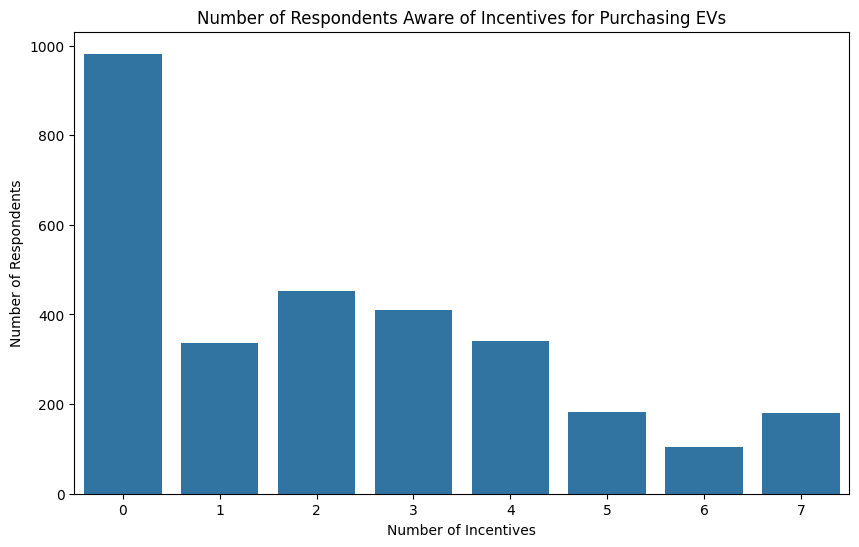

In [ ]:
# Bar plot showing the number of respondents aware of incentives for purchasing EVs
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, x='numofincentives')
plt.title('Number of Respondents Aware of Incentives for Purchasing EVs')
plt.xlabel('Number of Incentives')
plt.ylabel('Number of Respondents')
plt.show()




In [ ]:
# Bar plot for fuel type familiarity with PHEVs and BEVs
fig = go.Figure()
fig.add_trace(go.Bar(x=['PHEV', 'BEV'], y=[data2['fuelaphev'].mean(), data2['fuelabev'].mean()], name='Fuel Type Familiarity'))
fig.update_layout(title='Fuel Type Familiarity with PHEVs and BEVs',
                  xaxis_title='EV Type',
                  yaxis_title='Average Familiarity Level')
fig.show()


In [ ]:
# Bar plot for brand familiarity with PHEVs and BEVs
fig = go.Figure()
fig.add_trace(go.Bar(x=['PHEV', 'BEV'], y=[data2['nameaphev'].mean(), data2['nameabev'].mean()], name='Brand Familiarity'))
fig.update_layout(title='Brand Familiarity with PHEVs and BEVs',
                  xaxis_title='EV Type',
                  yaxis_title='Average Familiarity Level')
fig.show()

In [ ]:
# Box plot for number of incentives considered for EV purchase
fig = px.box(data2, y='numofincentives', title='Number of Incentives Considered for EV Purchase')
fig.update_yaxes(title='Number of Incentives')
fig.show()

In [ ]:
# Convert variables to categorical for better visualization
data2['fuelaphev'] = pd.Categorical(data2['fuelaphev'], ordered=True)
data2['fuelabev'] = pd.Categorical(data2['fuelabev'], ordered=True)
data2['nameabev'] = pd.Categorical(data2['nameabev'], ordered=True)
data2['nameaphev'] = pd.Categorical(data2['nameaphev'], ordered=True)
data2['infosearch'] = pd.Categorical(data2['infosearch'], ordered=True)
data2['BEVpositiveconvo'] = pd.Categorical(data2['BEVpositiveconvo'], ordered=True)
data2['PHEVpositiveconvo'] = pd.Categorical(data2['PHEVpositiveconvo'], ordered=True)
data2['numofincentives'] = pd.Categorical(data2['numofincentives'], ordered=True)
data2['advertaware'] = pd.Categorical(data2['advertaware'], ordered=True)
data2['HOVlaneuse'] = pd.Categorical(data2['HOVlaneuse'], ordered=True)

# Bar plot for fuel type familiarity with PHEVs
fig = px.histogram(data2, x='fuelaphev', title='Fuel Type Familiarity with PHEVs')
fig.update_layout(xaxis_title='Fuel Type Familiarity', yaxis_title='Frequency')
fig.show()

# Bar plot for fuel type familiarity with BEVs
fig = px.histogram(data2, x='fuelabev', title='Fuel Type Familiarity with BEVs')
fig.update_layout(xaxis_title='Fuel Type Familiarity', yaxis_title='Frequency')
fig.show()

# Bar plot for brand familiarity with BEVs
fig = px.histogram(data2, x='nameabev', title='Brand Familiarity with BEVs')
fig.update_layout(xaxis_title='Brand Familiarity', yaxis_title='Frequency')
fig.show()

# Bar plot for brand familiarity with PHEVs
fig = px.histogram(data2, x='nameaphev', title='Brand Familiarity with PHEVs')
fig.update_layout(xaxis_title='Brand Familiarity', yaxis_title='Frequency')
fig.show()

# Bar plot for level of information search regarding EVs
fig = px.histogram(data2, x='infosearch', title='Level of Information Search regarding EVs')
fig.update_layout(xaxis_title='Information Search Level', yaxis_title='Frequency')
fig.show()

# Bar plot for positive conversations about BEVs
fig = px.histogram(data2, x='BEVpositiveconvo', title='Positive Conversations about BEVs')
fig.update_layout(xaxis_title='Positive Conversations', yaxis_title='Frequency')
fig.show()

# Bar plot for positive conversations about PHEVs
fig = px.histogram(data2, x='PHEVpositiveconvo', title='Positive Conversations about PHEVs')
fig.update_layout(xaxis_title='Positive Conversations', yaxis_title='Frequency')
fig.show()

# Bar plot for number of incentives considered for EV purchase
fig = px.histogram(data2, x='numofincentives', title='Number of Incentives Considered for EV Purchase')
fig.update_layout(xaxis_title='Number of Incentives', yaxis_title='Frequency')
fig.show()

# Bar plot for awareness of EV-related advertisements
fig = px.histogram(data2, x='advertaware', title='Awareness of EV-related Advertisements')
fig.update_layout(xaxis_title='Awareness Level', yaxis_title='Frequency')
fig.show()

# Bar plot for usage of HOV lanes
fig = px.histogram(data2, x='HOVlaneuse', title='Usage of HOV Lanes')
fig.update_layout(xaxis_title='HOV Lane Usage', yaxis_title='Frequency')
fig.show()

# Bar plot for household income level
fig = px.histogram(data2, x='income', title='Household Income Level')
fig.update_layout(xaxis_title='Income', yaxis_title='Frequency')
fig.show()

# Bar plot for access to electricity
fig = px.histogram(data2, x='electricityaccess', title='Access to Electricity')
fig.update_layout(xaxis_title='Electricity Access Level', yaxis_title='Frequency')
fig.show()

In [ ]:
# Frequency distribution of charging infrastructure per capita
charging_infra_cols = ['allchargerspercapita', 'allchargerspercapitawork', 'allchargersperdiffwork']
charging_infra_data = data2[charging_infra_cols].melt(var_name='Infrastructure Type', value_name='Density')

fig_charging_infra = px.histogram(charging_infra_data, x='Density', color='Infrastructure Type',
                                  title='Charging Infrastructure Density',
                                  labels={'Density': 'Density per Capita', 'Infrastructure Type': 'Infrastructure Type'})
fig_charging_infra.update_layout(barmode='overlay')
fig_charging_infra.show()

In [ ]:
# Frequency distribution of market considerations related to BEVs and PHEVs

market_considerations_cols = ['bevchargingandrange', 'bevsafety', 'bevmarketability', 'PHEVchargingandrange',
                               'phevsafety', 'phevmarketability']

# Filter out columns that exist in the DataFrame
existing_cols = [col for col in market_considerations_cols if col in data2.columns]

# Melt the DataFrame with existing columns
market_considerations_data = data2[existing_cols].melt(var_name='Market Consideration', value_name='Rating')

fig_market_considerations = px.histogram(market_considerations_data, x='Rating', color='Market Consideration',
                                          title='Market Considerations for BEVs and PHEVs',
                                          labels={'Rating': 'Rating', 'Market Consideration': 'Market Consideration'})
fig_market_considerations.update_layout(barmode='overlay')
fig_market_considerations.show()


In [ ]:
# Frequency distribution of consideration of purchasing a BEV
bev_consideration_freq = data2['ordBEVconsider'].value_counts().reset_index()
bev_consideration_freq.columns = ['Consideration Level', 'Frequency']

fig_bev_consideration = px.bar(bev_consideration_freq, x='Consideration Level', y='Frequency',
                               title='Consideration of Purchasing a BEV',
                               labels={'Consideration Level': 'Consideration Level', 'Frequency': 'Frequency'})
fig_bev_consideration.show()

In [ ]:
# Frequency distribution of consideration of purchasing a PHEV
phev_consideration_freq = data2['ordPHEVconsider'].value_counts().reset_index()
phev_consideration_freq.columns = ['Consideration Level', 'Frequency']

fig_phev_consideration = px.bar(phev_consideration_freq, x='Consideration Level', y='Frequency',
                                title='Consideration of Purchasing a PHEV',
                                labels={'Consideration Level': 'Consideration Level', 'Frequency': 'Frequency'})
fig_phev_consideration.show()

In [ ]:
# Frequency distribution of seeing electric vehicle supply equipment (EVSE)
evse_visibility_freq = data2['seeEVSE'].value_counts().reset_index()
evse_visibility_freq.columns = ['Visibility', 'Frequency']

fig_evse_visibility = px.bar(evse_visibility_freq, x='Visibility', y='Frequency',
                             title='Visibility of Electric Vehicle Supply Equipment (EVSE)',
                             labels={'Visibility': 'Visibility', 'Frequency': 'Frequency'})
fig_evse_visibility.show()

In [ ]:
age_grouped = data2.groupby('age')

<ipython-input-156-0ea84aed8feb>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




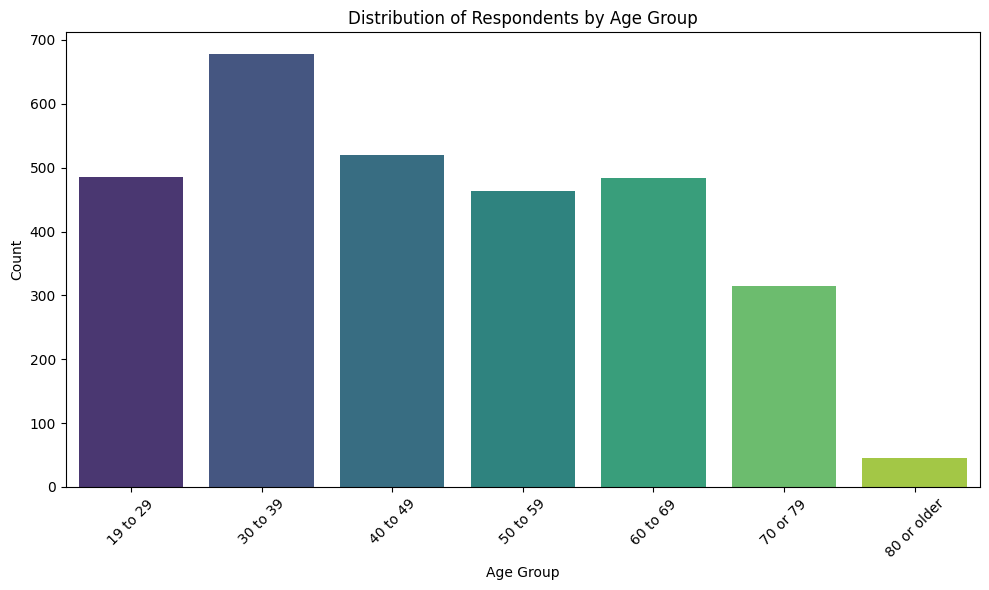

In [ ]:
# Counting the number of records in each age group
age_counts = age_grouped.size().reset_index(name='counts')

# Plotting a bar chart for the distribution of age groups
plt.figure(figsize=(10, 6))
sns.barplot(data=age_counts, x='age', y='counts', palette='viridis')
plt.title('Distribution of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-157-7d445b0e20ee>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




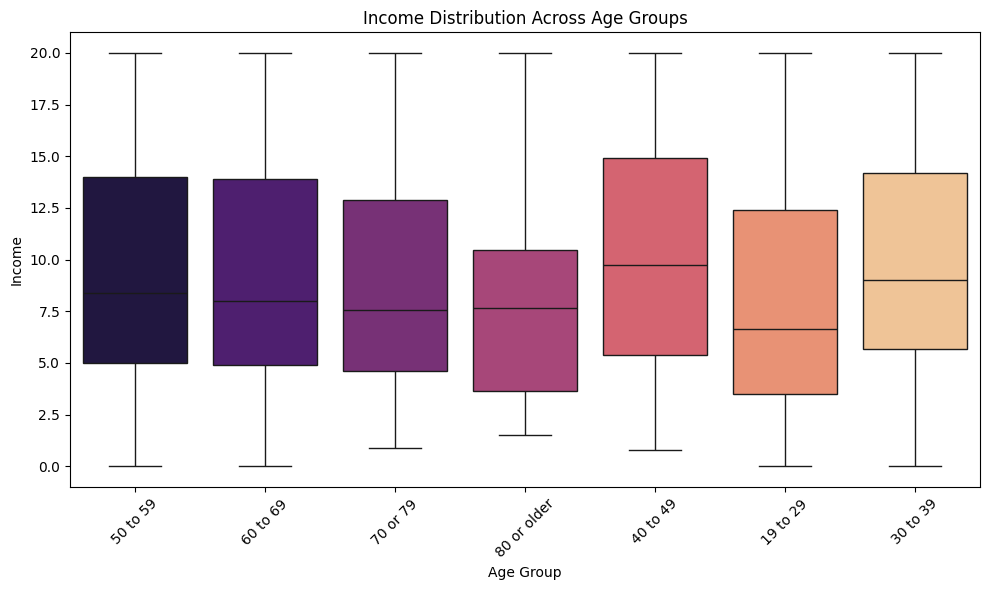

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data2, x='age', y='income', palette='magma')
plt.title('Income Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-158-aa22e19ff17a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




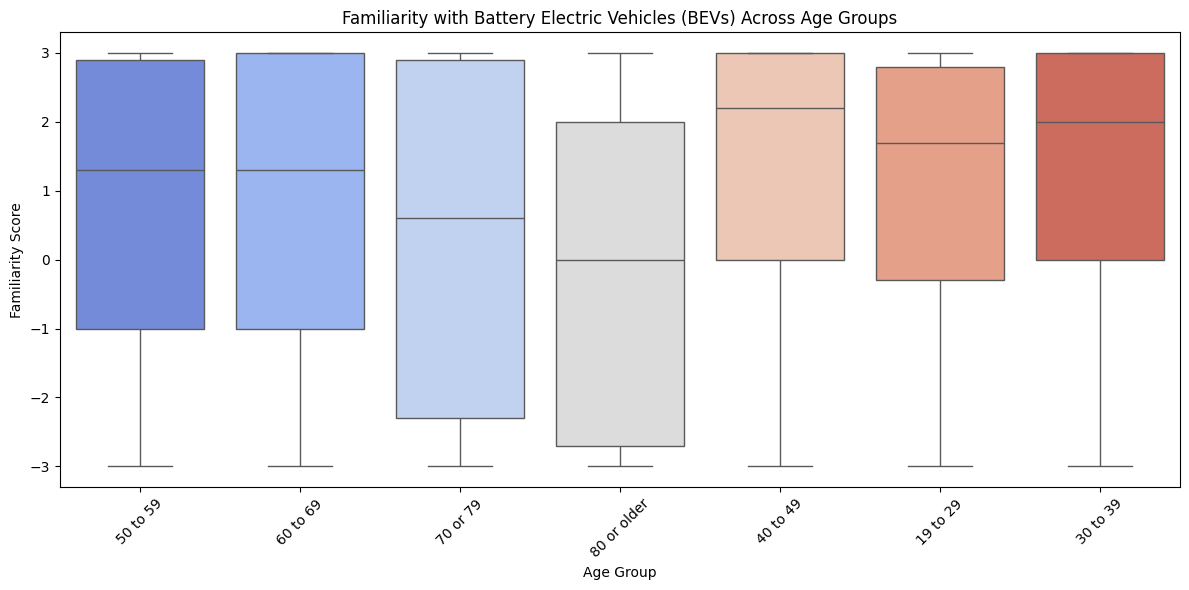

In [ ]:
# Visualizing familiarity with BEVs and PHEVs across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=data2, x='age', y='BEVfamiliarity', palette='coolwarm')
plt.title('Familiarity with Battery Electric Vehicles (BEVs) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Familiarity Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-159-8143ce8a5d4a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




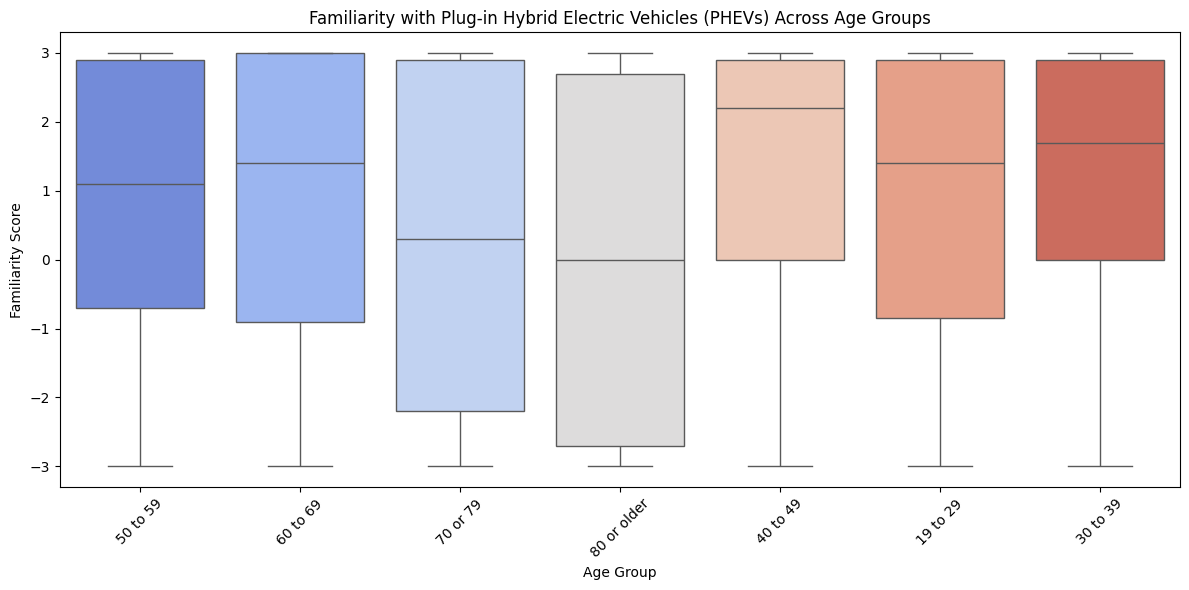

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data2, x='age', y='PHEVfamiliarity', palette='coolwarm')
plt.title('Familiarity with Plug-in Hybrid Electric Vehicles (PHEVs) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Familiarity Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

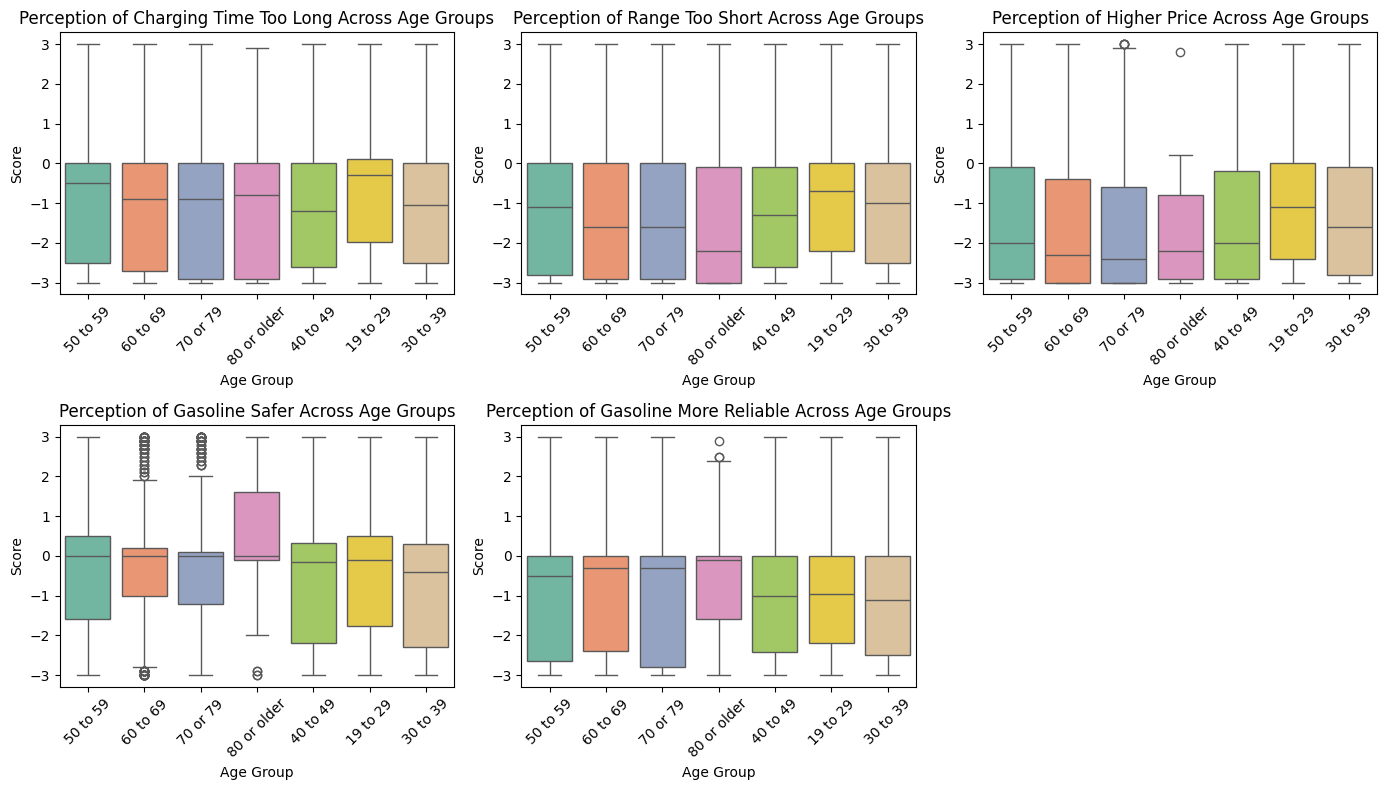

In [ ]:
# Visualizing perceptions of EV attributes across age groups
perception_cols = ['iBEVchargetoolong', 'iBEVrangetooshort', 'iBEVhigherprice', 'iBEVgasolinesafer', 'iBEVgasolinemorereliable']
perception_labels = ['Charging Time Too Long', 'Range Too Short', 'Higher Price', 'Gasoline Safer', 'Gasoline More Reliable']

plt.figure(figsize=(14, 8))
for i, col in enumerate(perception_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data2, x='age', y=col, hue='age', palette='Set2', dodge=False)
    plt.title(f'Perception of {perception_labels[i]} Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Score')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Visualizing whether respondents are commuters or not across age groups
commuter_fig = px.histogram(data2, x='age', color='commuter', barmode='group', labels={'age': 'Age Group', 'commuter': 'Commuter Status'},
                            title='Commuter Status Across Age Groups')
commuter_fig.update_layout(xaxis={'categoryorder':'total descending'})
commuter_fig.show()


In [ ]:
# Visualizing perceptions or experiences with home charging for BEVs and PHEVs across age groups
plugin_labels = ['BEV Plugin at Home', 'PHEV Plugin at Home']
plugin_fig = go.Figure()

for i, col in enumerate(plugin_cols):
    plugin_counts = data2.groupby(['age', col]).size().reset_index(name='count')
    plugin_fig.add_trace(go.Bar(x=plugin_counts[plugin_counts[col] == 1]['age'], y=plugin_counts[plugin_counts[col] == 1]['count'],
                                 name='Yes - ' + plugin_labels[i]))
    plugin_fig.add_trace(go.Bar(x=plugin_counts[plugin_counts[col] == 0]['age'], y=plugin_counts[plugin_counts[col] == 0]['count'],
                                 name='No - ' + plugin_labels[i]))

plugin_fig.update_layout(barmode='stack', title='Perceptions of Home Charging Across Age Groups',
                         xaxis_title='Age Group', yaxis_title='Count')
plugin_fig.show()

In [ ]:
# Visualizing whether respondents feel there is sufficient charging infrastructure available for BEVs and PHEVs across age groups
enoughcharging_labels = ['BEV Enough Charging', 'PHEV Enough Charging']
enoughcharging_fig = go.Figure()

for i, col in enumerate(enoughcharging_cols):
    enoughcharging_counts = data2.groupby(['age', col]).size().reset_index(name='count')
    enoughcharging_fig.add_trace(go.Bar(x=enoughcharging_counts[enoughcharging_counts[col] == 1]['age'],
                                        y=enoughcharging_counts[enoughcharging_counts[col] == 1]['count'],
                                        name='Yes - ' + enoughcharging_labels[i]))
    enoughcharging_fig.add_trace(go.Bar(x=enoughcharging_counts[enoughcharging_counts[col] == 0]['age'],
                                        y=enoughcharging_counts[enoughcharging_counts[col] == 0]['count'],
                                        name='No - ' + enoughcharging_labels[i]))

enoughcharging_fig.update_layout(barmode='stack', title='Perceptions of Charging Infrastructure Across Age Groups',
                                 xaxis_title='Age Group', yaxis_title='Count')
enoughcharging_fig.show()


In [ ]:
# Visualizing perceptions of environmental damage caused by BEVs and PHEVs across age groups
envdamage_labels = ['BEV Environmental Damage', 'PHEV Environmental Damage']
envdamage_fig = go.Figure()

for i, col in enumerate(envdamage_cols):
    envdamage_fig.add_trace(go.Box(x=data2['age'], y=data2[col], name=envdamage_labels[i]))

envdamage_fig.update_layout(title='Perceptions of Environmental Damage Across Age Groups',
                            xaxis_title='Age Group', yaxis_title='Perception Score')
envdamage_fig.show()


In [ ]:
# Visualizing perceptions of whether BEVs and PHEVs are suitable for mass-market adoption across age groups
massmarket_labels = ['BEV Mass Market Suitability', 'PHEV Mass Market Suitability']
massmarket_fig = go.Figure()

for i, col in enumerate(massmarket_cols):
    massmarket_counts = data2.groupby(['age', col]).size().reset_index(name='count')
    massmarket_fig.add_trace(go.Bar(x=massmarket_counts[massmarket_counts[col] == 1]['age'],
                                     y=massmarket_counts[massmarket_counts[col] == 1]['count'],
                                     name='Yes - ' + massmarket_labels[i]))
    massmarket_fig.add_trace(go.Bar(x=massmarket_counts[massmarket_counts[col] == 0]['age'],
                                     y=massmarket_counts[massmarket_counts[col] == 0]['count'],
                                     name='No - ' + massmarket_labels[i]))

massmarket_fig.update_layout(barmode='stack', title='Perceptions of Mass Market Adoption Across Age Groups',
                             xaxis_title='Age Group', yaxis_title='Count')
massmarket_fig.show()

In [ ]:
# Visualizing income distribution across different age groups
income_box_fig = px.box(data2, x='age', y='income', color='age', title='Income Distribution Across Age Groups')
income_box_fig.update_layout(xaxis_title='Age Group', yaxis_title='Income', showlegend=False)
income_box_fig.show()


In [ ]:
# Visualizing the density of charging infrastructure per capita across different age groups
charging_density_fig = px.bar(data2, x='age', y=['allchargerspercapita', 'allchargerspercapitawork', 'allchargersperdiffwork'],
                              title='Charging Infrastructure Density Across Age Groups', barmode='group')
charging_density_fig.update_layout(xaxis_title='Age Group', yaxis_title='Charging Infrastructure Density',
                                   legend_title='Charging Infrastructure Type')
charging_density_fig.show()

In [ ]:
# Visualizing perceptions of safety attributes for BEVs and PHEVs across age groups
safety_cols = ['bevsafety', 'phevsafety']
safety_labels = ['BEV Safety', 'PHEV Safety']

safety_box_fig = go.Figure()

for i, col in enumerate(safety_cols):
    safety_box_fig.add_trace(go.Box(x=data2['age'], y=data2[col], name=safety_labels[i]))

safety_box_fig.update_layout(title='Perceptions of Safety Attributes Across Age Groups',
                             xaxis_title='Age Group', yaxis_title='Perception Score')
safety_box_fig.show()

In [ ]:
# Visualizing perceptions of marketability attributes for BEVs and PHEVs across age groups
marketability_cols = ['bevmarketability', 'phevmarketability']
marketability_labels = ['BEV Marketability', 'PHEV Marketability']

marketability_box_fig = go.Figure()

for i, col in enumerate(marketability_cols):
    marketability_box_fig.add_trace(go.Box(x=data2['age'], y=data2[col], name=marketability_labels[i]))

marketability_box_fig.update_layout(title='Perceptions of Marketability Attributes Across Age Groups',
                                    xaxis_title='Age Group', yaxis_title='Perception Score')
marketability_box_fig.show()